In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psutil

# Scikit-Learn
# Data Splitting
from sklearn.model_selection import train_test_split

# Data Encoding and Scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler

# Classification Models in Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Techniques in Classification Models using Scikit-Learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv('alzheimers_prediction_dataset.csv', nrows=30000)

In [3]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [4]:
df.shape

(30000, 25)

In [5]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [6]:
duplicated_row = df[df.duplicated()]
duplicated_row

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis


In [7]:
df['Education Level'].unique()

array([ 1,  7, 19, 17,  3,  2, 18, 11, 15, 10,  6, 13, 12,  4, 16,  5, 14,
        0,  8,  9])

In [8]:
df['Family History of Alzheimer’s'].unique()

array(['No', 'Yes'], dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               30000 non-null  object 
 1   Age                                   30000 non-null  int64  
 2   Gender                                30000 non-null  object 
 3   Education Level                       30000 non-null  int64  
 4   BMI                                   30000 non-null  float64
 5   Physical Activity Level               30000 non-null  object 
 6   Smoking Status                        30000 non-null  object 
 7   Alcohol Consumption                   30000 non-null  object 
 8   Diabetes                              30000 non-null  object 
 9   Hypertension                          30000 non-null  object 
 10  Cholesterol Level                     30000 non-null  object 
 11  Family History 

In [10]:
age_AlzheimerInCountry = df.groupby(['Age','Alzheimer’s Diagnosis']).size().unstack()
age_AlzheimerInCountry = age_AlzheimerInCountry.div(age_AlzheimerInCountry.sum(axis=1),axis=0)*100
age_AlzheimerInCountry

Alzheimer’s Diagnosis,No,Yes
Age,,
50,84.240688,15.759312
51,83.407407,16.592593
52,83.281250,16.718750
53,82.120253,17.879747
54,81.402003,18.597997
55,86.393443,13.606557
56,84.427481,15.572519
57,83.176101,16.823899
58,82.621502,17.378498


In [11]:
bins = [49,65,75,100,float('inf')]
labels = ['50-65','66-75','76-100','100+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [12]:
null_rows = df[df['AgeGroup'].isnull()]
null_rows

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis,AgeGroup


In [13]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis,AgeGroup
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,High,Retired,Single,No,Low,Medium,High,Urban,No,76-100
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No,66-75
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Medium,Employed,Single,No,Low,Medium,High,Rural,No,76-100
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Medium,Retired,Single,No,High,Medium,Low,Rural,No,50-65
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,High,Employed,Married,No,Low,Medium,High,Rural,No,50-65


In [14]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

<font size="6" color='pink'>Visualization</font>

In [15]:
drunk_country = df.groupby(['Country','Alcohol Consumption']).size().unstack()
drunk_country = drunk_country.div(drunk_country.sum(axis=1),axis=0)*100
drunk_country

Alcohol Consumption,Never,Occasionally,Regularly
Country,,,
Argentina,35.369993,34.419552,30.210455
Australia,32.759720,32.313576,34.926705
Brazil,33.958724,33.958724,32.082552
Canada,35.418083,31.747111,32.834806
China,35.416667,31.896552,32.686782
France,32.443258,31.775701,35.781041
Germany,32.352941,34.771242,32.875817
India,33.620690,32.095491,34.283820
Italy,33.126722,34.228650,32.644628


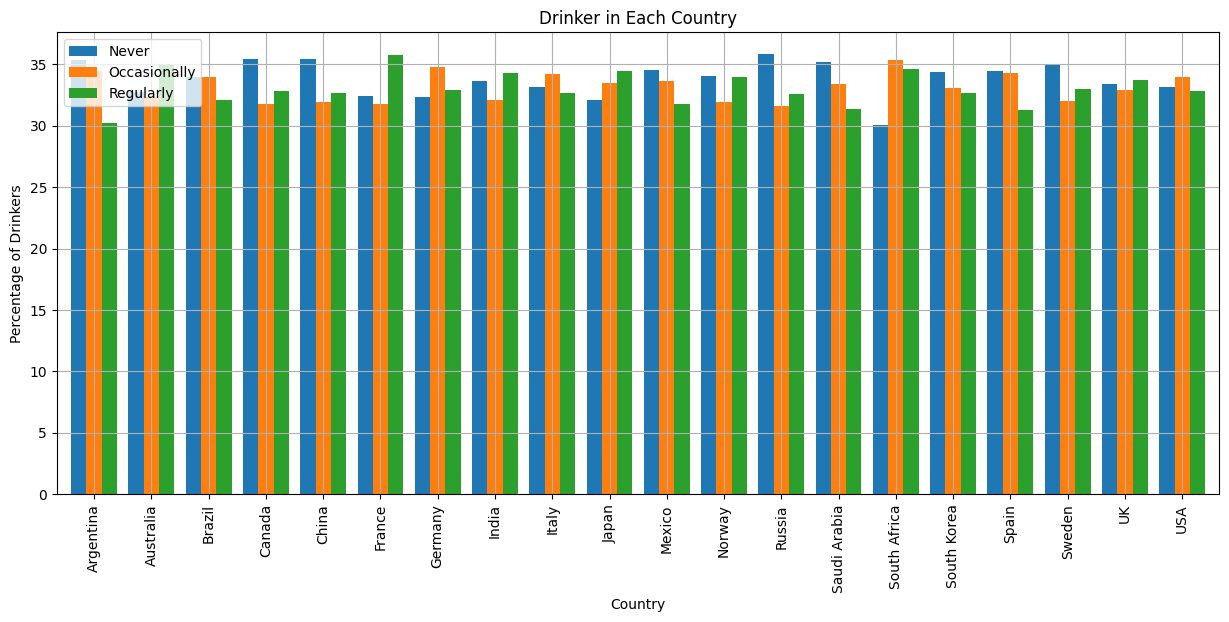

In [16]:
data = drunk_country
data.plot(kind='bar', figsize=(15,6), width=0.8)
plt.title('Drinker in Each Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Drinkers')
plt.legend(loc='best')
plt.grid()
plt.show()

In [17]:
smoke_country = df.groupby(['Country','Smoking Status']).size().unstack()
smoke_country = smoke_country.div(smoke_country.sum(axis=1),axis=0)*100
smoke_country

Smoking Status,Current,Former,Never
Country,,,
Argentina,32.247115,34.351663,33.401222
Australia,35.372849,30.783939,33.843212
Brazil,33.145716,30.706692,36.147592
Canada,34.262407,32.630863,33.106730
China,34.985632,34.554598,30.459770
France,33.110814,34.846462,32.042724
Germany,34.967320,34.313725,30.718954
India,33.753316,34.880637,31.366048
Italy,32.093664,35.812672,32.093664


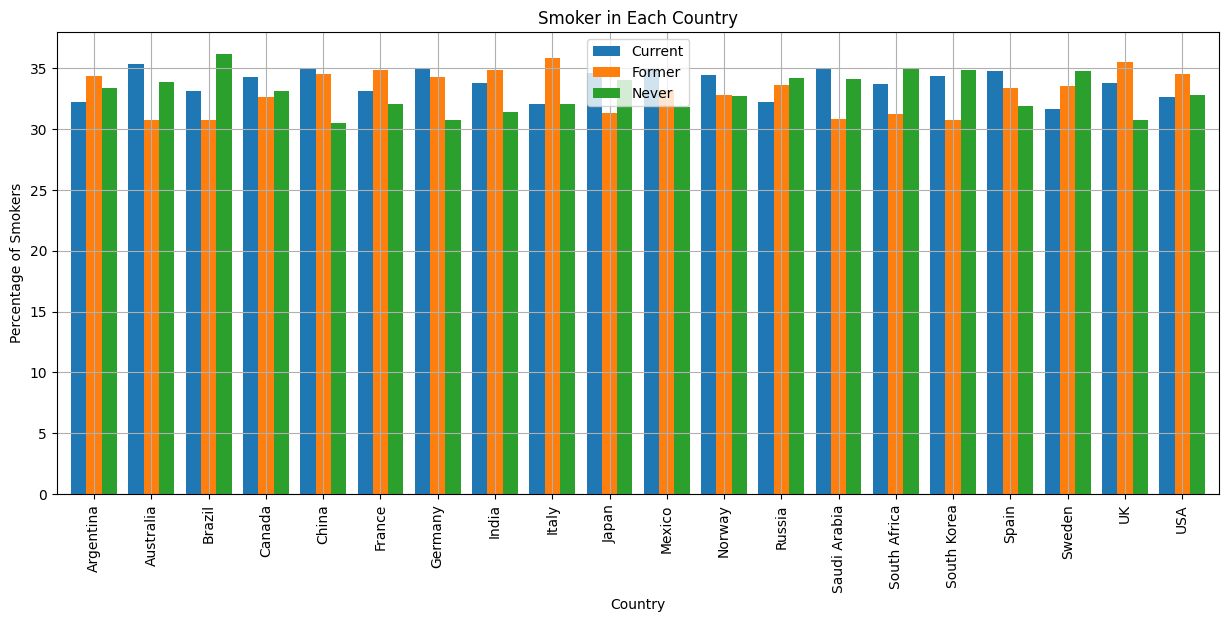

In [18]:
data = smoke_country
data.plot(kind='bar', figsize=(15,6), width=0.8)
plt.title('Smoker in Each Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Smokers')
plt.legend(loc='best')
plt.grid()
plt.show()

In [19]:
genderInCountry = df.groupby(['Country','Gender']).size().unstack()
genderInCountry = genderInCountry.div(genderInCountry.sum(axis=1),axis=0)*100
genderInCountry

Gender,Female,Male
Country,,
Argentina,48.336728,51.663272
Australia,48.502231,51.497769
Brazil,48.843027,51.156973
Canada,50.849762,49.150238
China,50.359195,49.640805
France,49.399199,50.600801
Germany,47.843137,52.156863
India,50.862069,49.137931
Italy,51.446281,48.553719


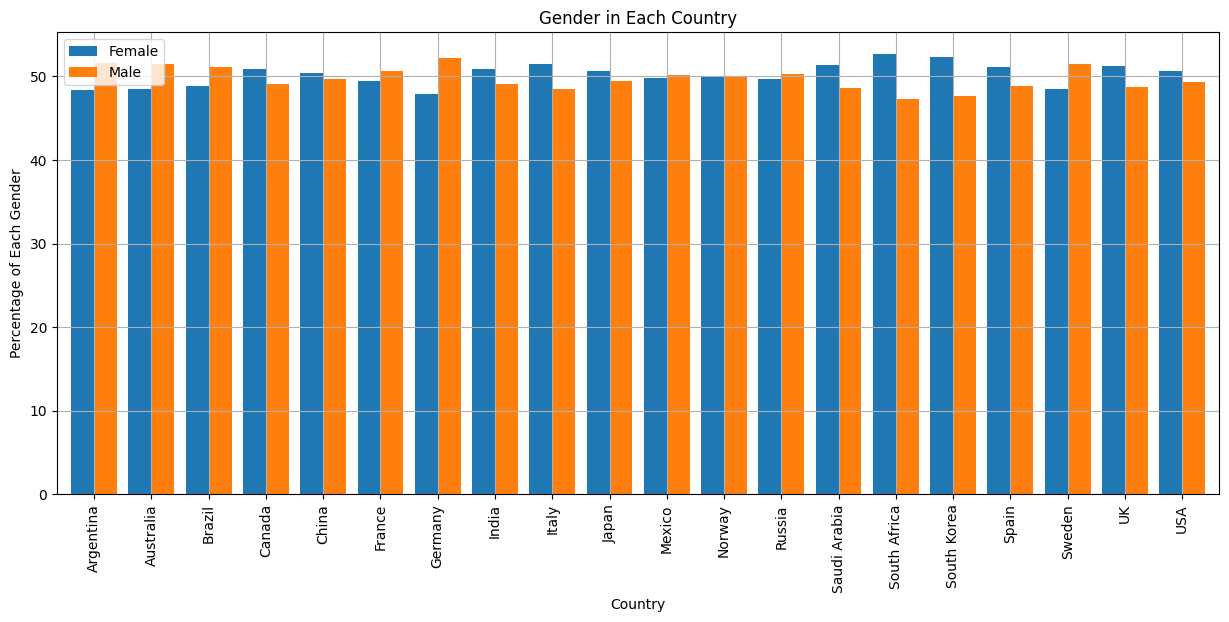

In [20]:
data = genderInCountry
data.plot(kind='bar', figsize=(15,6), width=0.8)
plt.title('Gender in Each Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Each Gender')
plt.legend(loc='best')
plt.grid()
plt.show()

In [21]:
male = df[df['Gender'] == 'Male']
maleSmokerInCountry = male.groupby(['Country','Smoking Status']).size().unstack()
maleSmokerInCountry = maleSmokerInCountry.div(maleSmokerInCountry.sum(axis=1),axis=0)*100
maleSmokerInCountry

Smoking Status,Current,Former,Never
Country,,,
Argentina,31.011827,35.085414,33.902760
Australia,36.014851,28.341584,35.643564
Brazil,32.151589,31.173594,36.674817
Canada,34.301521,32.503458,33.195021
China,35.745297,34.298119,29.956585
France,32.321900,36.147757,31.530343
Germany,34.711779,34.711779,30.576441
India,32.928475,34.412955,32.658570
Italy,32.765957,38.156028,29.078014


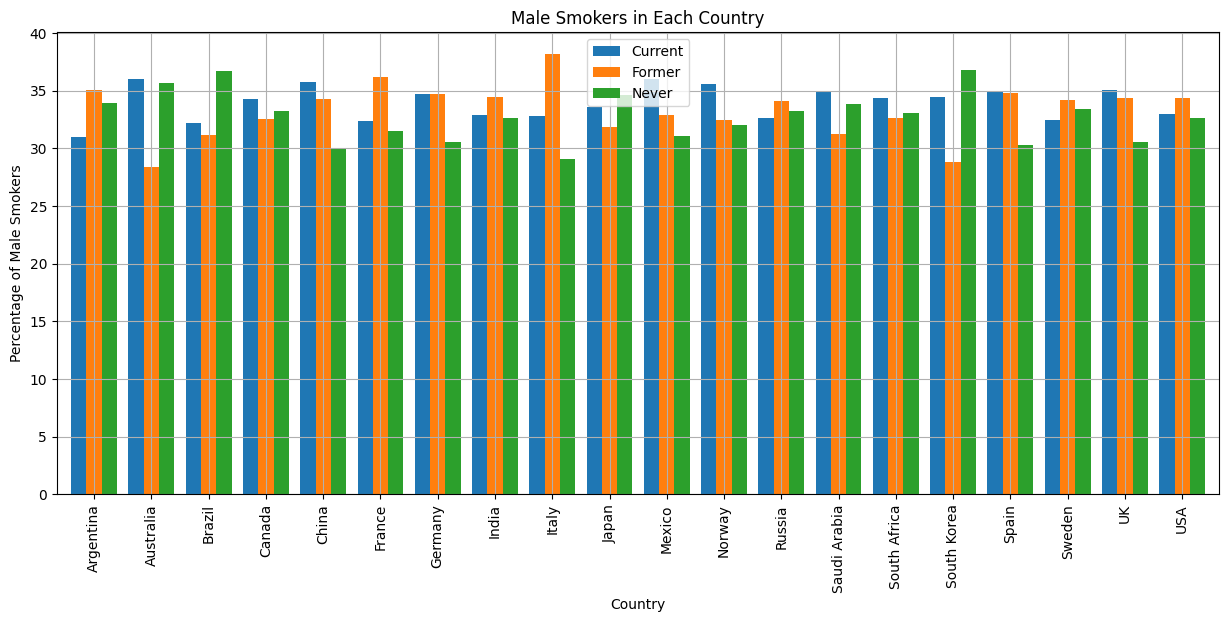

In [22]:
data_male = maleSmokerInCountry
data_male.plot(kind='bar', figsize=(15,6), width=0.8)
plt.title('Male Smokers in Each Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Male Smokers')
plt.legend(loc='best')
plt.grid()
plt.show()

In [23]:
female = df[df['Gender'] == 'Female']
femaleSmokerInCountry = female.groupby(['Country','Smoking Status']).size().unstack()
femaleSmokerInCountry = femaleSmokerInCountry.div(femaleSmokerInCountry.sum(axis=1),axis=0)*100
femaleSmokerInCountry

Smoking Status,Current,Former,Never
Country,,,
Argentina,33.567416,33.567416,32.865169
Australia,34.691196,33.377135,31.931669
Brazil,34.186940,30.217670,35.595391
Canada,34.224599,32.754011,33.021390
China,34.236805,34.807418,30.955777
France,33.918919,33.513514,32.567568
Germany,35.245902,33.879781,30.874317
India,34.550196,35.332464,30.117340
Italy,31.459170,33.601071,34.939759


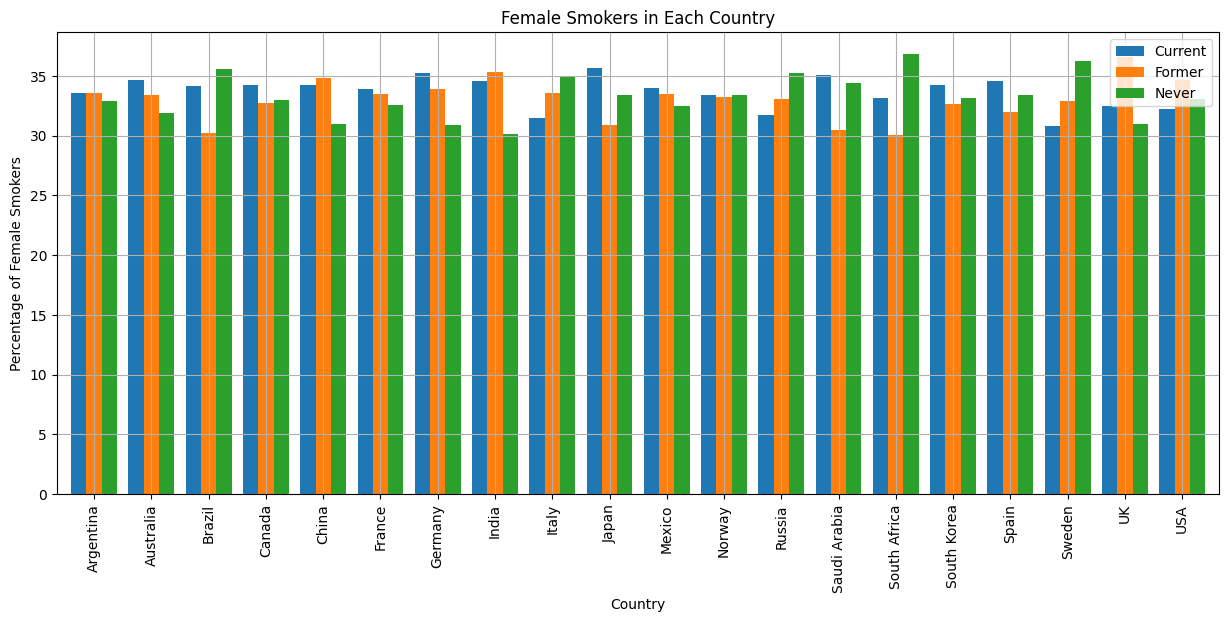

In [24]:
data_female = femaleSmokerInCountry
data_female.plot(kind='bar', figsize=(15,6), width=0.8)
plt.title('Female Smokers in Each Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Female Smokers')
plt.legend(loc='best')
plt.grid()
plt.show()

In [25]:
df.head(2)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis,AgeGroup
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,High,Retired,Single,No,Low,Medium,High,Urban,No,76-100
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No,66-75


In [26]:
agegroup_alzheimer = df.groupby(['AgeGroup','Alzheimer’s Diagnosis']).size().unstack()
agegroup_alzheimer = agegroup_alzheimer.div(agegroup_alzheimer.sum(axis=1),axis=0)*100
agegroup_alzheimer

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18772\2467500648.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_alzheimer = df.groupby(['AgeGroup','Alzheimer’s Diagnosis']).size().unstack()


Alzheimer’s Diagnosis,No,Yes
AgeGroup,,
50-65,84.156826,15.843174
66-75,63.648813,36.351187
76-100,33.372265,66.627735
100+,NaN,NaN


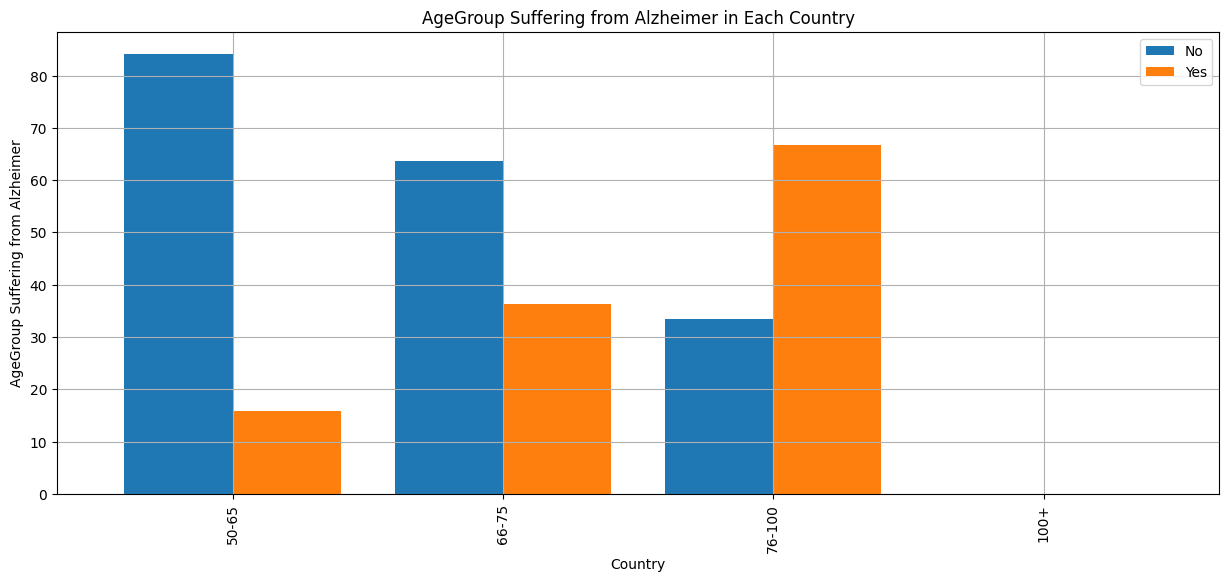

In [27]:
data_agegroup = agegroup_alzheimer
data_agegroup.plot(kind='bar', figsize=(15,6), width=0.8)
plt.title('AgeGroup Suffering from Alzheimer in Each Country')
plt.xlabel('Country')
plt.ylabel('AgeGroup Suffering from Alzheimer')
plt.legend(loc='best')
plt.grid()
plt.show()

In [28]:
male = df[df['Gender'] == 'Male']
male_agegroup_alzheimer = male.groupby(['AgeGroup','Alzheimer’s Diagnosis']).size().unstack()
male_agegroup_alzheimer = male_agegroup_alzheimer.div(male_agegroup_alzheimer.sum(axis=1),axis=0)*100
male_agegroup_alzheimer

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18772\2647477204.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_agegroup_alzheimer = male.groupby(['AgeGroup','Alzheimer’s Diagnosis']).size().unstack()


Alzheimer’s Diagnosis,No,Yes
AgeGroup,,
50-65,83.759055,16.240945
66-75,63.945154,36.054846
76-100,33.765632,66.234368
100+,NaN,NaN


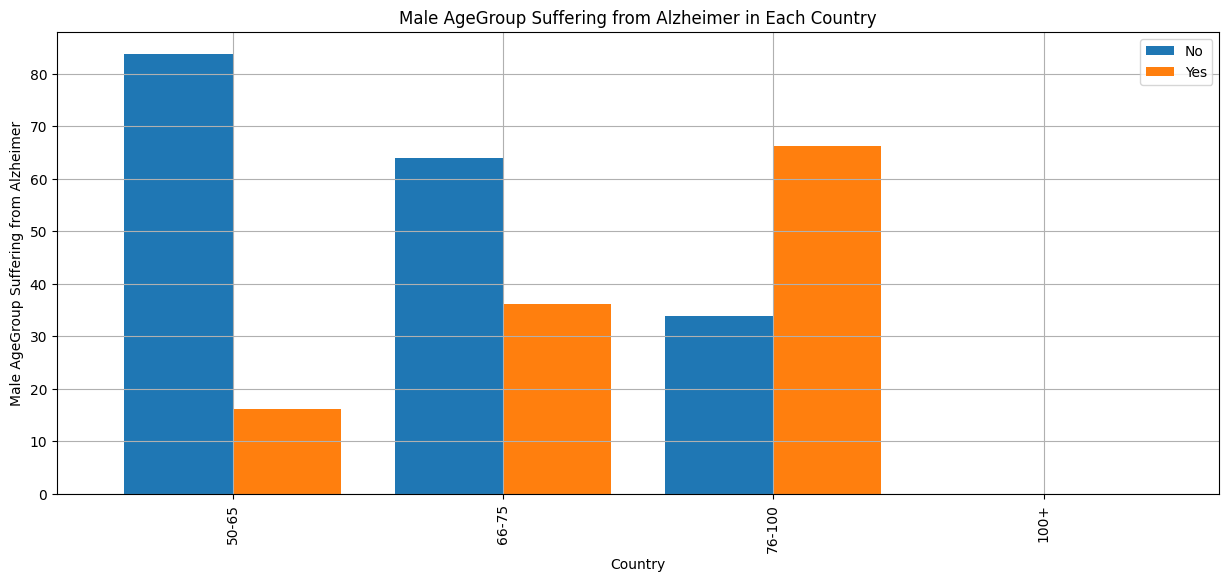

In [29]:
data_agegroup_male = male_agegroup_alzheimer
data_agegroup_male.plot(kind='bar', figsize=(15,6), width=0.8)
plt.title('Male AgeGroup Suffering from Alzheimer in Each Country')
plt.xlabel('Country')
plt.ylabel('Male AgeGroup Suffering from Alzheimer')
plt.legend(loc='best')
plt.grid()
plt.show()

In [30]:
female = df[df['Gender'] == 'Female']
female_agegroup_alzheimer = female.groupby(['AgeGroup','Alzheimer’s Diagnosis']).size().unstack()
female_agegroup_alzheimer = female_agegroup_alzheimer.div(female_agegroup_alzheimer.sum(axis=1),axis=0)*100
female_agegroup_alzheimer

C:\Users\Dushyant\AppData\Local\Temp\ipykernel_18772\3438026667.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_agegroup_alzheimer = female.groupby(['AgeGroup','Alzheimer’s Diagnosis']).size().unstack()


Alzheimer’s Diagnosis,No,Yes
AgeGroup,,
50-65,84.547668,15.452332
66-75,63.366042,36.633958
76-100,32.972039,67.027961
100+,NaN,NaN


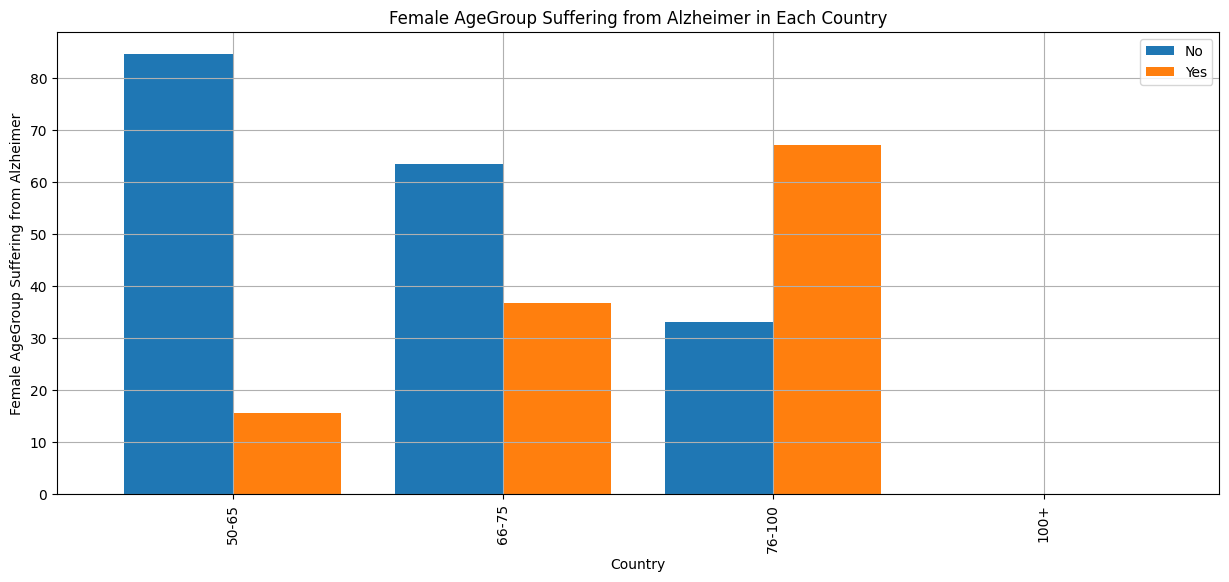

In [31]:
data_agegroup_female = female_agegroup_alzheimer
data_agegroup_female.plot(kind='bar', figsize=(15,6), width=0.8)
plt.title('Female AgeGroup Suffering from Alzheimer in Each Country')
plt.xlabel('Country')
plt.ylabel('Female AgeGroup Suffering from Alzheimer')
plt.legend(loc='best')
plt.grid()
plt.show()

<font size="6" color='pink'>Data Splitting</font>

In [32]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis', 'AgeGroup'],
      dtype='object')

In [33]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis,AgeGroup
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,High,Retired,Single,No,Low,Medium,High,Urban,No,76-100
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No,66-75
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Medium,Employed,Single,No,Low,Medium,High,Rural,No,76-100
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Medium,Retired,Single,No,High,Medium,Low,Rural,No,50-65
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,High,Employed,Married,No,Low,Medium,High,Rural,No,50-65


In [34]:
df.drop('Education Level', axis=1, inplace=True)

In [35]:
target_df = df['Alzheimer’s Diagnosis']

In [36]:
df.drop('Alzheimer’s Diagnosis', axis=1, inplace=True)

In [37]:
X = df
y = target_df

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [39]:
print(f'Length of X_train is {len(X_train)}')
print(f'Length of X_test is {len(X_test)}')
print(f'Length of y_train is {len(y_train)}')
print(f'Length of y_test is {len(y_test)}')

Length of X_train is 24000
Length of X_test is 6000
Length of y_train is 24000
Length of y_test is 6000


In [40]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


<font size="6" color='pink'>Data Encoding</font>

<font size="3" color='yellow'>Label Encoding for Alzheimer's Diagnosis</font>

In [41]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [42]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [43]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<font size="3" color='yellow'>Applying Column Transformer</font>

In [44]:
for col in ['Depression Level', 'Air Pollution Exposure', 'Social Engagement Level', 
            'Income Level', 'Stress Levels', 'Physical Activity Level']:
    print(f"{col}: {X_train[col].unique()}")

Depression Level: ['Low' 'High' 'Medium']
Air Pollution Exposure: ['Medium' 'Low' 'High']
Social Engagement Level: ['Medium' 'High' 'Low']
Income Level: ['High' 'Low' 'Medium']
Stress Levels: ['Low' 'High' 'Medium']
Physical Activity Level: ['Low' 'High' 'Medium']


In [45]:
print(X_train.columns)

Index(['Country', 'Age', 'Gender', 'BMI', 'Physical Activity Level',
       'Smoking Status', 'Alcohol Consumption', 'Diabetes', 'Hypertension',
       'Cholesterol Level', 'Family History of Alzheimer’s',
       'Cognitive Test Score', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
       'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)',
       'Social Engagement Level', 'Income Level', 'Stress Levels',
       'Urban vs Rural Living', 'AgeGroup'],
      dtype='object')


In [46]:
transformer = ColumnTransformer(transformers = [
    ('t1',OneHotEncoder(sparse_output=False, drop='first'),['Country','Gender','Urban vs Rural Living','Diabetes','Hypertension','Family History of Alzheimer’s','Genetic Risk Factor (APOE-ε4 allele)','Cholesterol Level']),
    ('t2',OrdinalEncoder(categories=[['Low','Medium','High']]*6), ['Depression Level','Air Pollution Exposure','Social Engagement Level','Income Level','Stress Levels','Physical Activity Level']),
    ('t3',OrdinalEncoder(categories=[['Never', 'Former', 'Current']]), ['Smoking Status']),
    ('t4',OrdinalEncoder(categories=[['Never', 'Occasionally', 'Regularly']]), ['Alcohol Consumption']),
    ('t5',OrdinalEncoder(categories=[['Single', 'Widowed', 'Married']]), ['Marital Status']),
    ('t6',OrdinalEncoder(categories=[['Unemployed', 'Employed', 'Retired']]), ['Employment Status']),
    ('t7',OrdinalEncoder(categories=[['50-65', '66-75', '76-100','100+']]), ['AgeGroup']),
    ('t8',OrdinalEncoder(categories=[['Unhealthy', 'Average', 'Healthy']]), ['Dietary Habits']),
    ('t9',OrdinalEncoder(categories=[['Poor', 'Average', 'Good']]), ['Sleep Quality'])
], remainder='passthrough')

In [47]:
X_train.shape

(24000, 24)

In [48]:
X_train = transformer.fit_transform(X_train)

In [49]:
X_test = transformer.transform(X_test)

In [50]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


<font size="6" color='pink'>Data Scaling</font>

In [89]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [97]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
X_train

array([[-1.29080007, -1.2960018 , -1.27555764, ..., -5.46145334,
        -5.92211901, -3.24160891],
       [-1.29080007, -1.2960018 , -1.27555764, ..., -5.61571979,
        -5.63294647, -3.15772453],
       [-1.29080007, -1.2960018 , -1.27555764, ..., -5.67505304,
        -5.900212  , -3.14785578],
       ...,
       [-1.29080007, -1.2960018 , -1.27555764, ..., -5.41992007,
        -5.89583059, -3.24407609],
       [-1.29080007, -1.2960018 , -1.27555764, ..., -5.67505304,
        -5.66799769, -3.13798703],
       [-1.29080007, -1.2960018 , -1.27555764, ..., -5.62165312,
        -5.9177376 , -3.18733078]], shape=(24000, 42))

<font size="6" color='pink'>Model Training</font>

<font size="3" color='yellow'>Logistic Regression</font>

In [92]:
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [93]:
y_pred_lr = model_lr.predict(X_test)
len(y_pred_lr)

6000

<b><font size="2" color='red'>Evaluation</font></b>

In [94]:
# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)*100
print(f"Accuracy is {accuracy_lr}%")

Accuracy is 72.8%


In [95]:
# Precision
precision_lr = precision_score(y_test, y_pred_lr)*100
print(f"Precision is {precision_lr}%")

Precision is 66.8681526256139%


In [98]:
# Recall
recall_lr = recall_score(y_test, y_pred_lr)*100
print(f"Recall is {recall_lr}%")

Recall is 70.0990099009901%


In [99]:
# F1-Score
f1_score_lr = f1_score(y_test, y_pred_lr)*100
print(f"F1-Score is {f1_score_lr}%")

F1-Score is 68.44547563805105%


In [100]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
print()

diagram_lr = [['TP','FN'],['FP','TN']]
for row in diagram_lr:
    print(row)

[[2598  877]
 [ 755 1770]]

['TP', 'FN']
['FP', 'TN']


<font size="3" color='yellow'>Decision Trees</font>

In [101]:
model_dt = DecisionTreeClassifier(max_depth=5, criterion='entropy')
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [102]:
y_pred_dt = model_dt.predict(X_test)
len(y_pred_dt)

6000

<b><font size="2" color='red'>Evaluation</font></b>

In [103]:
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)*100
print(f"Accuracy is {accuracy_dt}%")

Accuracy is 72.96666666666667%


In [104]:
# Precision
precision_dt = precision_score(y_test, y_pred_dt)*100
print(f"Precision is {precision_dt}%")

Precision is 66.4241542379047%


In [105]:
# Recall
recall_dt = recall_score(y_test, y_pred_dt)*100
print(f"Recall is {recall_dt}%")

Recall is 72.31683168316832%


In [106]:
# F1-Score
f1_score_dt = f1_score(y_test, y_pred_dt)*100
print(f"F1-Score is {f1_score_dt}%")

F1-Score is 69.24535456958665%


In [107]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print(cm_dt)
print()

diagram_dt = [['TP','FN'],['FP','TN']]
for row in diagram_dt:
    print(row)

[[2552  923]
 [ 699 1826]]

['TP', 'FN']
['FP', 'TN']


<font size="3" color='yellow'>Random Forest</font>

In [108]:
model_rf = RandomForestClassifier(max_depth=10, n_estimators=100, criterion='entropy', max_features='sqrt')
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [109]:
y_pred_rf = model_rf.predict(X_test)
len(y_pred_rf)

6000

<b><font size="2" color='red'>Evaluation</font></b>

In [110]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)*100
print(f"Accuracy is {accuracy_rf}%")

Accuracy is 72.6%


In [111]:
# Precision
precision_rf = precision_score(y_test, y_pred_rf)*100
print(f"Precision is {precision_rf}%")

Precision is 66.44270250093318%


In [112]:
# Recall
recall_rf = recall_score(y_test, y_pred_rf)*100
print(f"Recall is {recall_rf}%")

Recall is 70.49504950495049%


In [113]:
# F1-Score
f1_score_rf = f1_score(y_test, y_pred_rf)*100
print(f"F1-Score is {f1_score_rf}%")

F1-Score is 68.40891621829363%


In [114]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
print()

diagram_rf = [['TP','FN'],['FP','TN']]
for row in diagram_rf:
    print(row)

[[2576  899]
 [ 745 1780]]

['TP', 'FN']
['FP', 'TN']


<font size="3" color='yellow'>K Nearest Neighbors</font>

In [115]:
model_nn = KNeighborsClassifier(n_neighbors=10 ,weights='distance', metric='euclidean')
model_nn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10, weights='distance')

In [116]:
y_pred_nn = model_nn.predict(X_test)
len(y_pred_nn)

6000

<b><font size="2" color='red'>Evaluation</font></b>

In [117]:
accuracy_nn = accuracy_score(y_test, y_pred_nn)*100
print(f"Accuracy is {accuracy_nn}%")

Accuracy is 64.41666666666667%


In [118]:
# Precision
precision_nn = precision_score(y_test, y_pred_nn)*100
print(f"Precision is {precision_nn}%")

Precision is 59.20679886685553%


In [119]:
# Recall
recall_nn = recall_score(y_test, y_pred_nn)*100
print(f"Recall is {recall_nn}%")

Recall is 49.663366336633665%


In [120]:
# F1-Score
f1_score_nn = f1_score(y_test, y_pred_nn)*100
print(f"F1-Score is {f1_score_nn}%")

F1-Score is 54.016799483092825%


In [121]:
# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
print(cm_nn)
print()

diagram_nn = [['TP','FN'],['FP','TN']]
for row in diagram_nn:
    print(row)

[[2611  864]
 [1271 1254]]

['TP', 'FN']
['FP', 'TN']


<font size="6" color='pink'>Visualization Before Scaling</font>

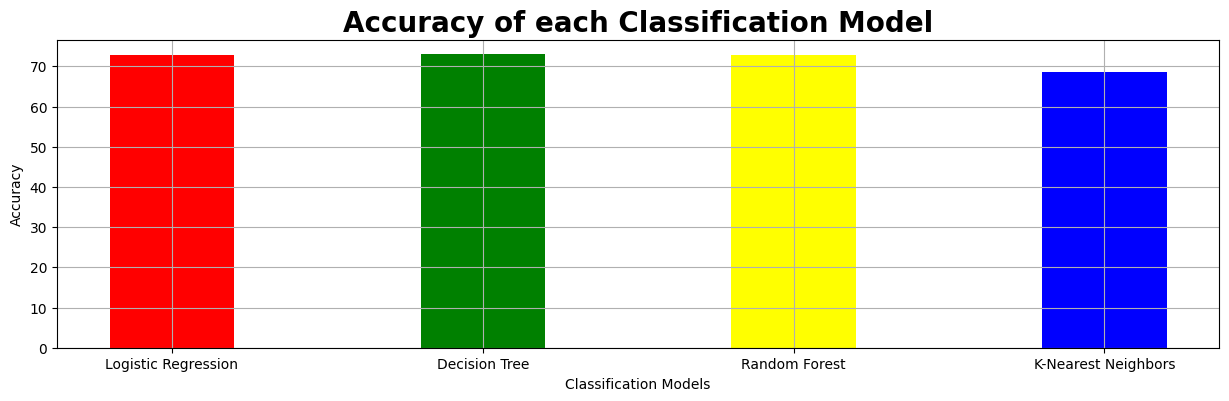

In [84]:
# for accuracy
data = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_nn]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
colors = ['red','green','yellow','blue']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("Accuracy of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

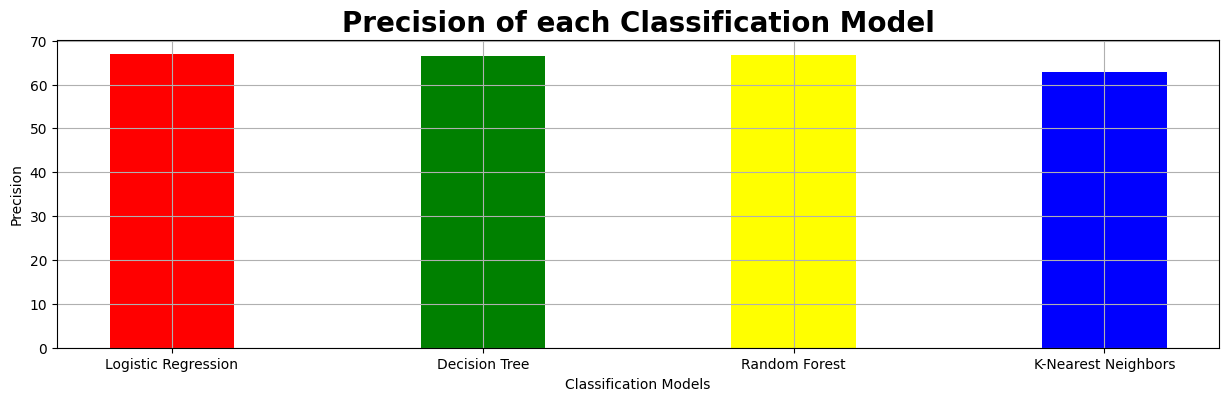

In [80]:
# for precision
data = [precision_lr, precision_dt, precision_rf, precision_nn]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
colors = ['red','green','yellow','blue']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Precision")
plt.xlabel("Classification Models")
plt.title("Precision of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

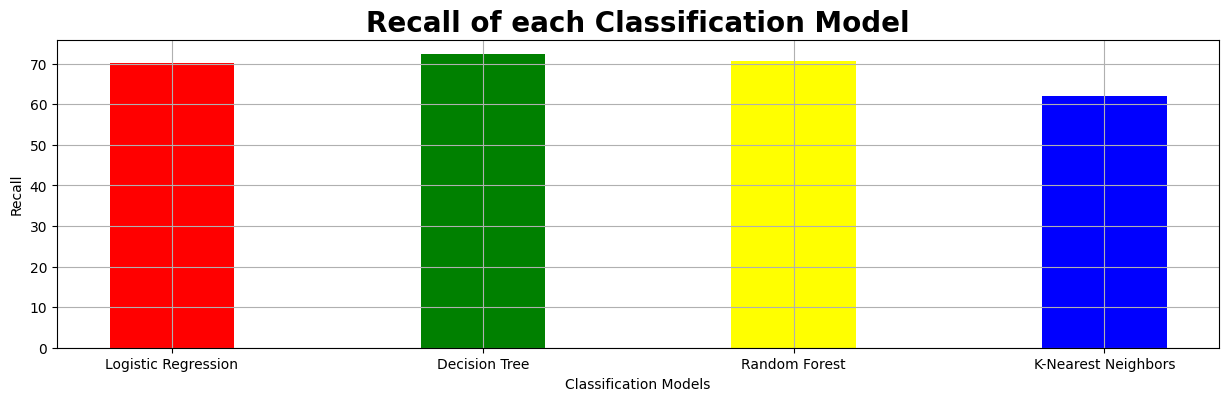

In [82]:
# for recall
data = [recall_lr, recall_dt, recall_rf, recall_nn]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
colors = ['red','green','yellow','blue']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Recall")
plt.xlabel("Classification Models")
plt.title("Recall of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

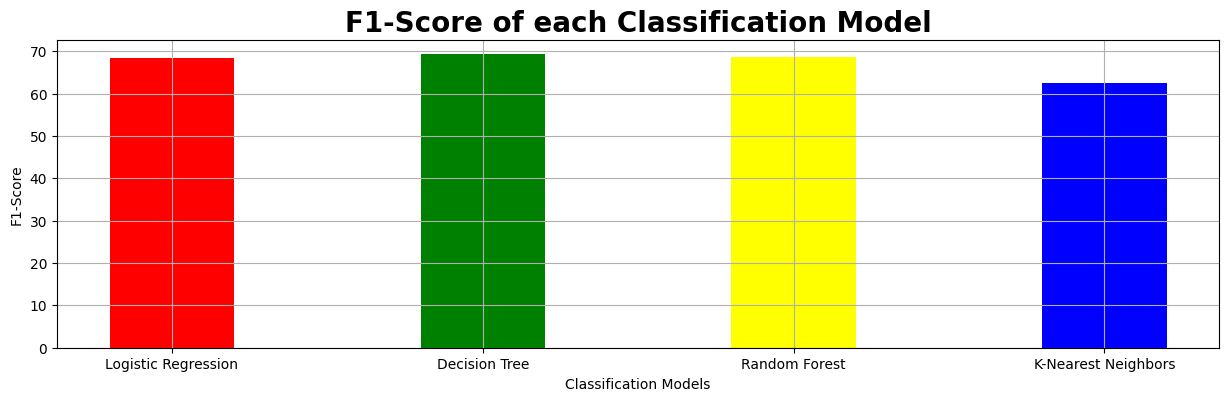

In [83]:
# for f1-score
data = [f1_score_lr, f1_score_dt, f1_score_rf, f1_score_nn]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
colors = ['red','green','yellow','blue']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("F1-Score")
plt.xlabel("Classification Models")
plt.title("F1-Score of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

<font size="6" color='pink'>Visualization After Scaling</font>

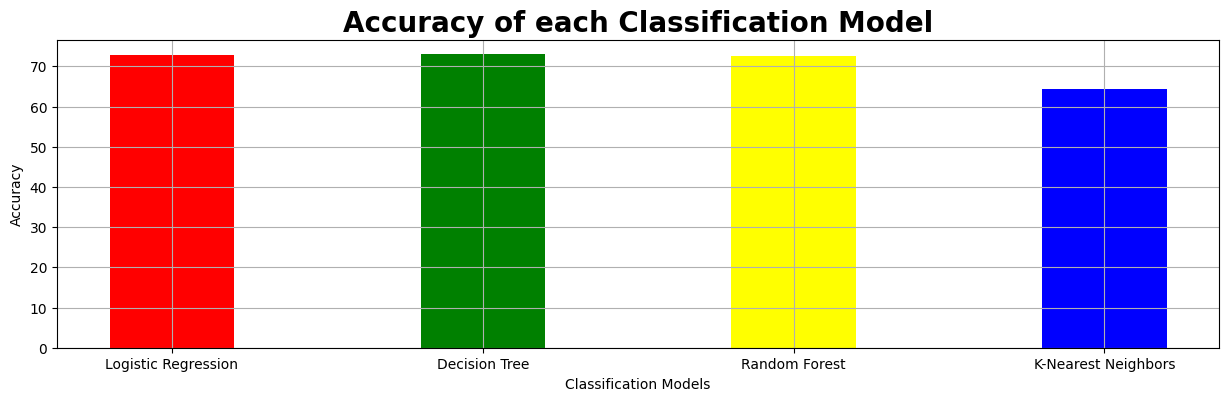

In [122]:
# for accuracy
data = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_nn]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
colors = ['red','green','yellow','blue']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Accuracy")
plt.xlabel("Classification Models")
plt.title("Accuracy of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

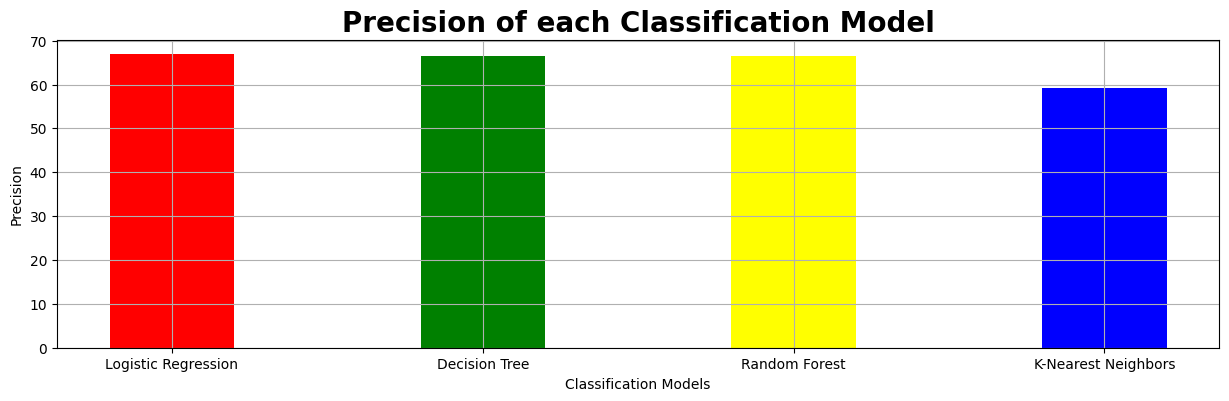

In [123]:
# for precision
data = [precision_lr, precision_dt, precision_rf, precision_nn]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
colors = ['red','green','yellow','blue']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Precision")
plt.xlabel("Classification Models")
plt.title("Precision of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

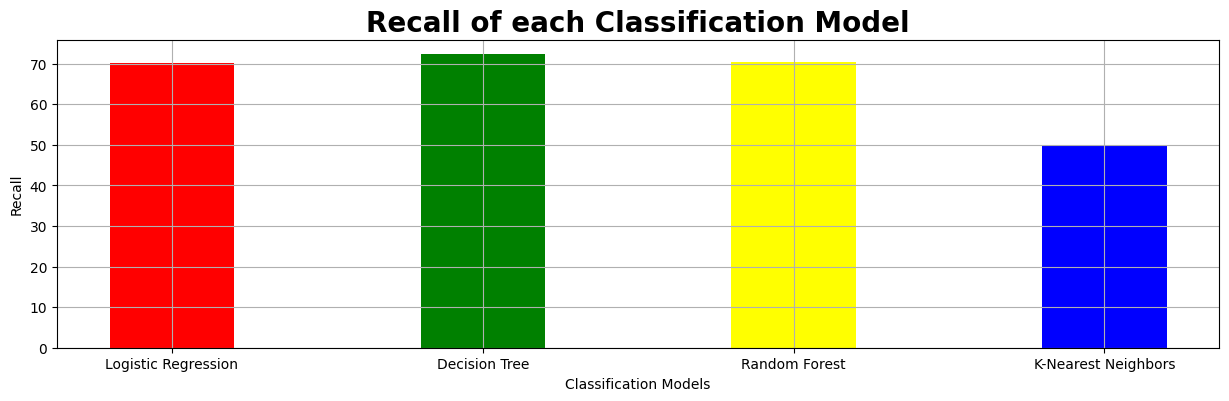

In [124]:
# for recall
data = [recall_lr, recall_dt, recall_rf, recall_nn]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
colors = ['red','green','yellow','blue']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("Recall")
plt.xlabel("Classification Models")
plt.title("Recall of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()

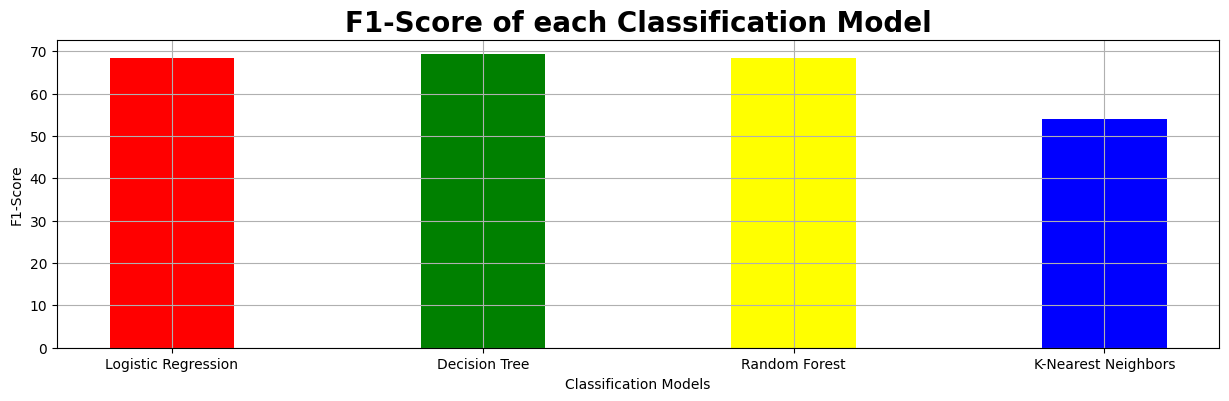

In [125]:
# for f1-score
data = [f1_score_lr, f1_score_dt, f1_score_rf, f1_score_nn]
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors']
colors = ['red','green','yellow','blue']
plt.figure(figsize=(15,4))
plt.bar(models, data, color=colors, width=0.4)
plt.ylabel("F1-Score")
plt.xlabel("Classification Models")
plt.title("F1-Score of each Classification Model", fontsize=20, fontweight='bold')
plt.grid()
plt.show()